# <FONT COLOR=RED>TELCO CUSTOMER CHURN ANALYSIS 

## <FONT COLOR= GREEN > Context
## <FONT COLOR = VIOLET >"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [133]:
df=pd.read_csv('dataset/Customer Churn.csv')

In [135]:
df.tail(100)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6943,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),30.50,30.5,Yes
6944,9039-ZVJDC,Male,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.10,53.05,No
6945,6797-LNAQX,Male,0,Yes,Yes,70,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,No,Bank transfer (automatic),98.30,6859.5,Yes
6946,9013-AQORL,Female,0,No,Yes,48,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,No,Credit card (automatic),45.55,2108.35,No
6947,2898-MRKPI,Male,0,Yes,Yes,68,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Credit card (automatic),101.05,6770.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### replaced blanks with 0 (zero) and no total charges are recorded 

In [140]:
df["TotalCharges"]=df["TotalCharges"].replace(" ",0)
df["TotalCharges"]=df["TotalCharges"].astype('float')

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [144]:
df.isnull().sum().sum()

0

In [146]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [148]:
df["customerID"].duplicated().sum()

0

In [150]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"


In [152]:
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [156]:
df.tail(100)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6943,0032-PGELS,Female,No,Yes,Yes,1,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),30.50,30.50,Yes
6944,9039-ZVJDC,Male,No,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.10,53.05,No
6945,6797-LNAQX,Male,No,Yes,Yes,70,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,No,Bank transfer (automatic),98.30,6859.50,Yes
6946,9013-AQORL,Female,No,No,Yes,48,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,No,Credit card (automatic),45.55,2108.35,No
6947,2898-MRKPI,Male,No,Yes,Yes,68,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Credit card (automatic),101.05,6770.50,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


#### Converted 0 and 1 values of Senior Citizen to Yes / No to make it eaasier to understand 

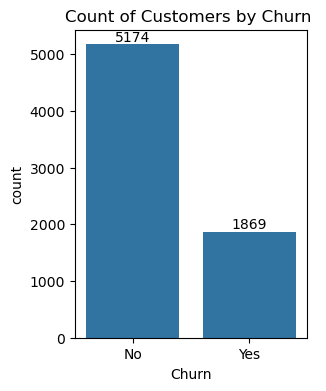

In [81]:
plt.figure(figsize = (3,4))
ax = sb.countplot(x = "Churn" , data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn " , fontsize =12 )
plt.show()

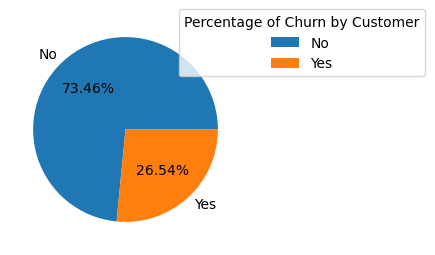

In [479]:
plt.figure(figsize=(3,3))
gb = df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb['Churn'] ,labels = gb.index , autopct = "%1.2f%%")
plt.legend(title="Percentage of Churn by Customer", bbox_to_anchor=(.7,.7))
plt.show()

#### From above chart concluded as 26.54% of our customers churned out 
## <font color='darkpink'>Let's Uncover reason behind Churn

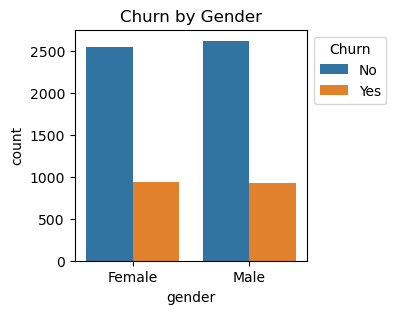

In [279]:
plt.figure(figsize = (3,3))
ax = sb.countplot(x = "gender" , data = df ,hue = "Churn")
plt.legend(title="Churn", bbox_to_anchor = (1,1))
plt.title("Churn by Gender" , fontsize =12 )
plt.show()

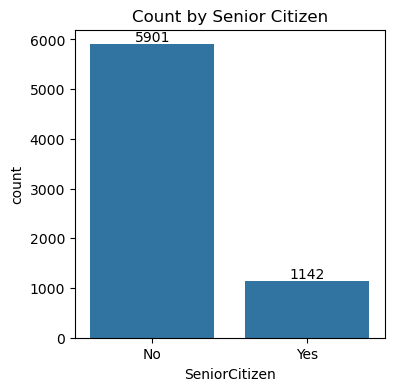

In [410]:
plt.figure(figsize = (4,4))
ax = sb.countplot(x = "SeniorCitizen" , data = df)
ax.bar_label(ax.containers[0])
plt.title("Count by Senior Citizen" , fontsize =12 )
plt.show()

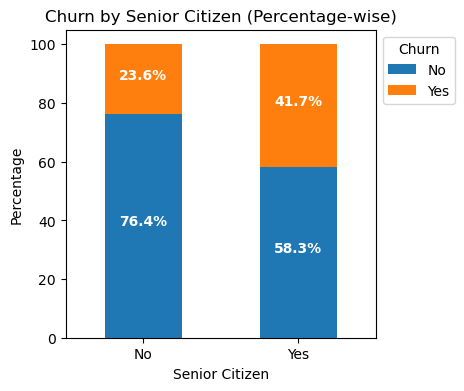

In [412]:
# Calculate count of Churn for each SeniorCitizen category
churn_counts = df.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).unstack() * 100

# Plot stacked percentage bar chart
churn_counts.plot(kind="bar", stacked=True, figsize=(4,4), color=["#1f77b4","#ff7f0e"])

# Add percentage labels on bars
for i, (index, row) in enumerate(churn_counts.iterrows()):
    plt.text(i, row["No"] / 2, f"{row['No']:.1f}%", ha="center", color="white", fontsize=10, fontweight="bold")
    plt.text(i, row["No"] + row["Yes"] / 2, f"{row['Yes']:.1f}%", ha="center", color="white", fontsize=10, fontweight="bold")

# Labels and title
plt.title("Churn by Senior Citizen (Percentage-wise)", fontsize=12)
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.legend(title="Churn", bbox_to_anchor = (1,1))
plt.xticks(rotation=0)
#plt.ylim(0, 100)

plt.show()

#### Comparitively a greater percentage of people in SeniorCitizen category have Churned 

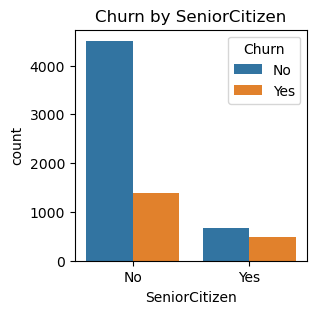

In [193]:
plt.figure(figsize=(3,3))
ax = sb.countplot(x = "SeniorCitizen" , data = df, hue = "Churn" )
plt.title("Churn by SeniorCitizen" , fontsize = 12 )
plt.show()

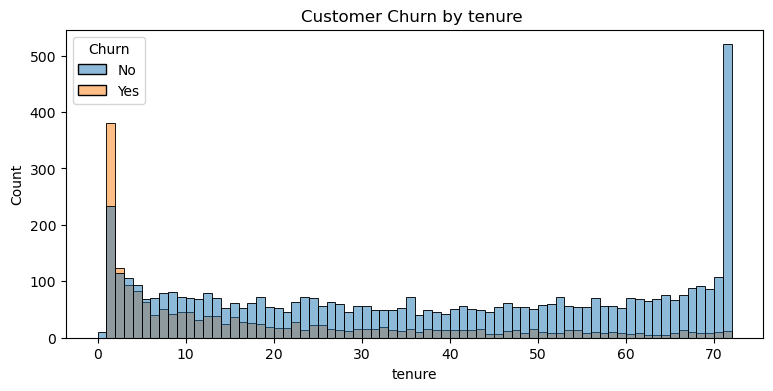

In [417]:
plt.figure(figsize = (9,4))
ax = sb.histplot(x = "tenure" , data = df , bins= 72 , hue ="Churn" )
plt.title("Customer Churn by tenure " , fontsize =12 )
plt.show()

#### people who have used our services for long , have stay continued with us rather than who used our service
#### 1 or 2 months , have churned 

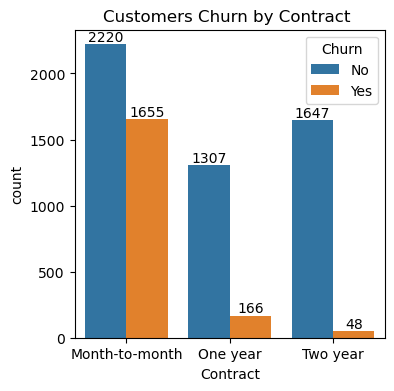

In [419]:
plt.figure(figsize=(4,4))
ax = sb.countplot(x = "Contract" , data = df, hue = "Churn" )
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Customers Churn by Contract " , fontsize = 12 )
plt.xticks
plt.show()

#### Customers having one to month contract are likely more churned than from those who have 1 or 2 years Contract
#### Customers on month-to-month contracts have the highest churn (1,655), while two-year contracts have the lowest (48)

In [422]:
import warnings as wr
wr.filterwarnings("ignore")

In [424]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

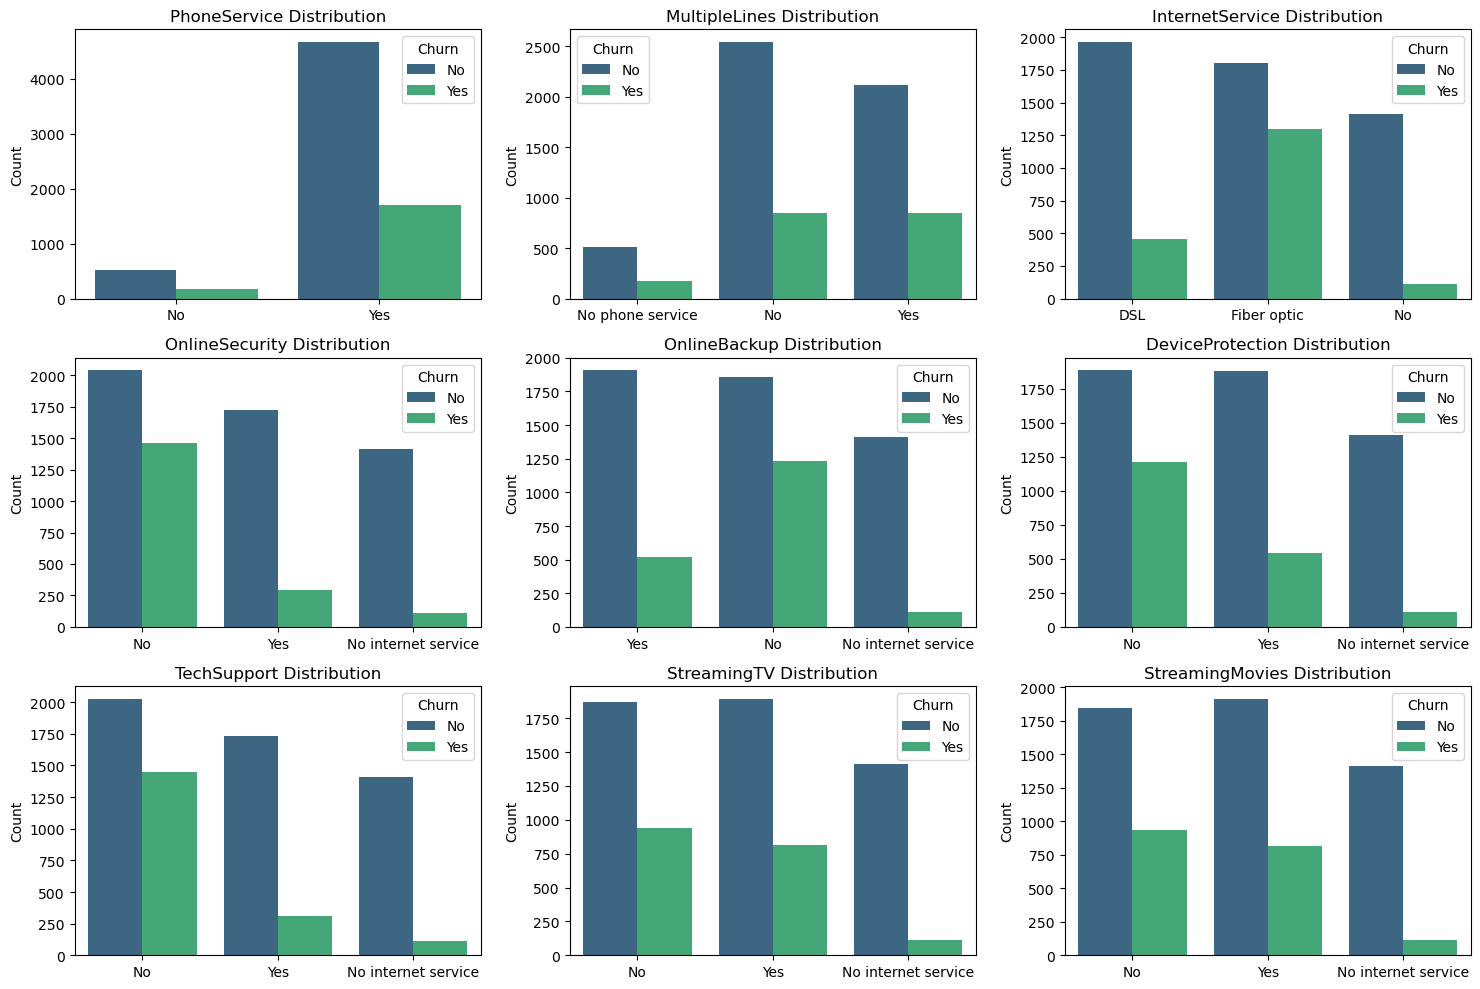

In [426]:
import matplotlib.pyplot as plt
import seaborn as sb

# Define the categorical columns for visualization
columns = ['PhoneService', 'MultipleLines', 'InternetService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Define number of rows and columns for the subplot grid
n_cols = 3  # 3 columns per row
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate rows dynamically

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten for easy indexing

# Choose a different color palette
palette_name = "Set2"  # Try "pastel", "dark", "coolwarm", "Spectral", etc.

# Loop through each column and plot a countplot
for i, col in enumerate(columns):
    sb.countplot(x=df[col], data=df, ax=axes[i], palette= "viridis" , hue="Churn")
    axes[i].set_title(f"{col} Distribution", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

# Remove any empty subplots (if fewer columns than grid size)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


#### Customers with PhoneService and MultipleLines mostly do not churn, while Fiber Optic Internet users have higher churn rates. 
#### Services like OnlineSecurity, OnlineBackup, and TechSupport indicate that customers without these features tend to churn more.
#### Streaming services (StreamingTV & StreamingMovies) have a balanced churn distribution, suggesting less impact on customer retention.

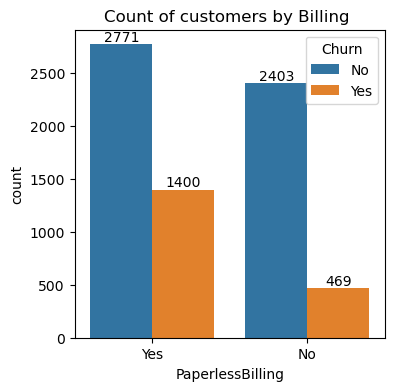

In [428]:
plt.figure(figsize=(4,4))
ax = sb.countplot(x = "PaperlessBilling" , data = df, hue = "Churn" )
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of customers by Billing " , fontsize = 12 )
plt.xticks
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
ax = sb.countplot(x = "PaymentMethod" , data = df, hue = "Churn" )
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of customers by PaymentMethod " , fontsize = 12 )
plt.legend(bbox_to_anchor=(1,1))
plt.xticks( rotation = 45)
plt.show()

#### People where using Electronic Check are likely to churn high  Comparetively using Other Payment Method    

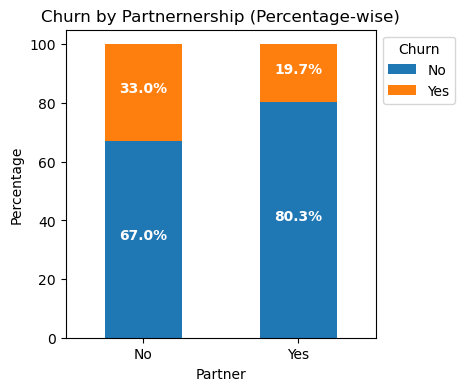

In [370]:
# Calculate count of Churn for each SeniorCitizen category
churn_counts = df.groupby("Partner")["Churn"].value_counts(normalize=True).unstack() * 100

# Plot stacked percentage bar chart
churn_counts.plot(kind="bar", stacked=True, figsize=(4,4), color=["#1f77b4","#ff7f0e"])

# Add percentage labels on bars
for i, (index, row) in enumerate(churn_counts.iterrows()):
    plt.text(i, row["No"] / 2, f"{row['No']:.1f}%", ha="center", color="white", fontsize=10, fontweight="bold")
    plt.text(i, row["No"] + row["Yes"] / 2, f"{row['Yes']:.1f}%", ha="center", color="white", fontsize=10, fontweight="bold")

# Labels and title
plt.title("Churn by Partnernership (Percentage-wise)", fontsize=12)
plt.xlabel("Partner")
plt.ylabel("Percentage")
plt.legend(title="Churn", bbox_to_anchor = (1,1))
plt.xticks(rotation=0)
#plt.ylim(0, 100)

plt.show()

#### 19.7 % people in Partnership and 33 % not in Partnership have Churned 

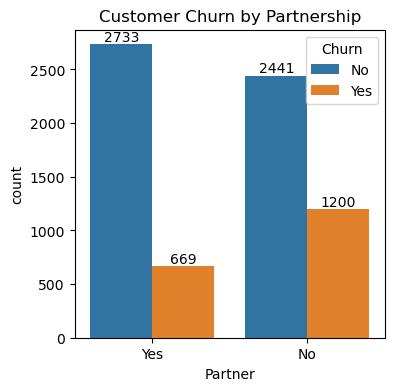

In [360]:
plt.figure(figsize=(4,4))
ax = sb.countplot(x = "Partner" , data =df , hue = "Churn" )
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Customer Churn by Partnership" , fontsize = 12)
plt.show()

#### People having in Partnership is less Churned Comparatively who were not in Partnership

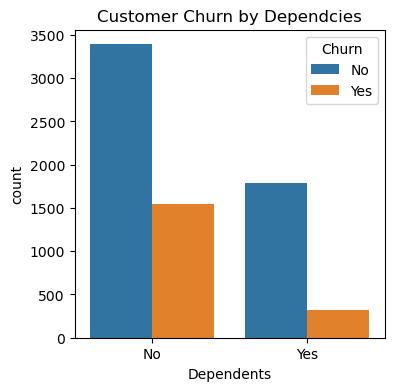

In [175]:
plt.figure(figsize=(4,4))
ax = sb.countplot(x="Dependents" , data= df , hue="Churn")
plt.title("Customer Churn by Dependcies" , fontsize = 12 )
plt.show()

#### Cusomers who not dependents are likely more to churned than who are not dependts 

In [378]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


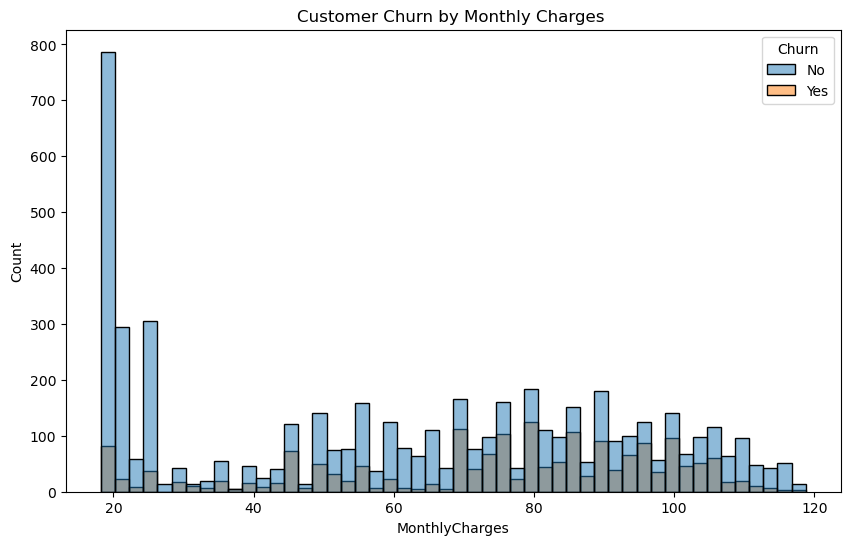

In [432]:
plt.figure(figsize=(10,6))
ax = sb.histplot(x = "MonthlyCharges" , data =df ,bins= 50 , hue = "Churn")
plt.title("Customer Churn by Monthly Charges " , fontsize = 12)
plt.show()

####  Churn is more frequent at higher monthly charges, indicating that cost-sensitive customers may be leaving. 
#### The distribution suggests higher retention at lower charges and increased churn at mid-to-high charges.

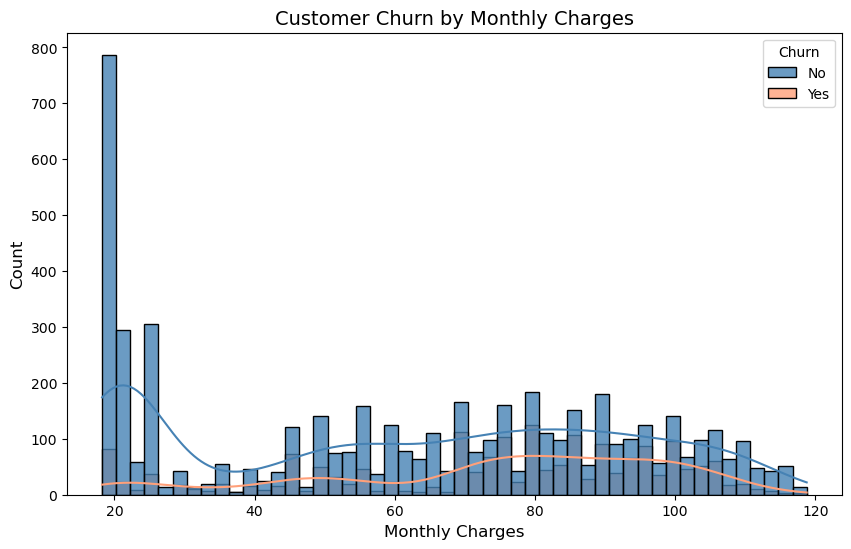

In [398]:
# Set figure size
plt.figure(figsize=(10, 6))

# Plot histogram using seaborn
sb.histplot(df, x="MonthlyCharges", hue="Churn", bins=50, kde=True, palette=["#4682B4", "#FFA07A"], alpha=0.8)

# Titles and labels
plt.title("Customer Churn by Monthly Charges", fontsize=14)
plt.xlabel("Monthly Charges", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show plot
plt.show()


####  Churn is more frequent at higher monthly charges, indicating that cost-sensitive customers may be leaving. 
#### The distribution suggests higher retention at lower charges and increased churn at mid-to-high charges.

In [ ]:
TotalCharges

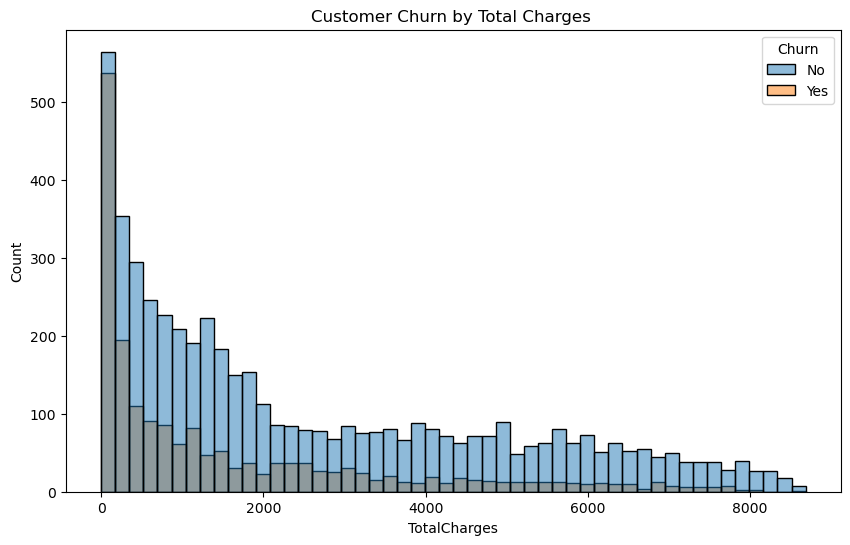

In [438]:
plt.figure(figsize=(10,6))
ax = sb.histplot(x = "TotalCharges" , data =df ,bins= 50, hue = "Churn")
plt.title("Customer Churn by Total Charges " , fontsize = 12)
plt.show()

#### Customers with low total charges (close to $0) exhibit the highest churn, suggesting they are new or short-term users.
#### As total charges increase, churn declines, indicating long-term customers are more likely to stay. This trend highlights 
#### that early retention strategies could help reduce churn.

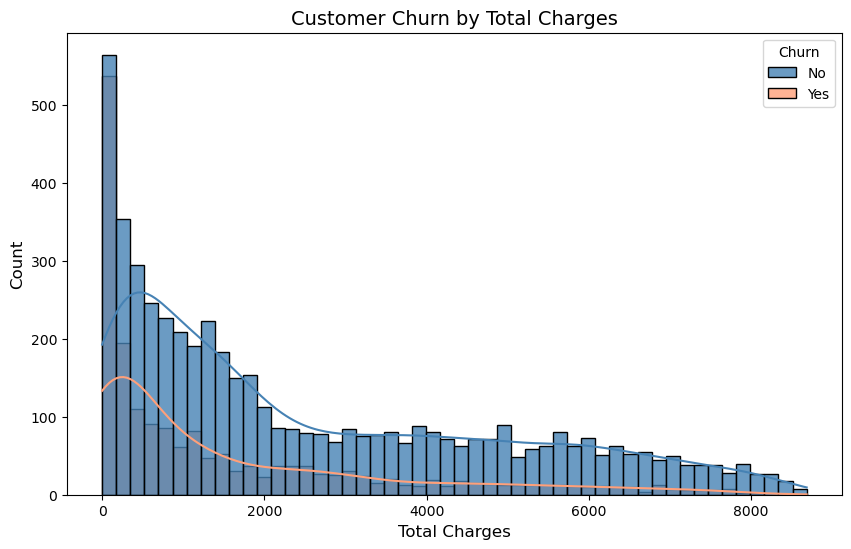

In [405]:
import matplotlib.pyplot as plt
import seaborn as sb

# Set figure size
plt.figure(figsize=(10, 6))

# Plot histogram using seaborn
sb.histplot(df, x="TotalCharges", hue="Churn", bins=50, kde=True, palette=["#4682B4", "#FFA07A"], alpha=0.8)

# Titles and labels
plt.title("Customer Churn by Total Charges", fontsize=14)
plt.xlabel("Total Charges", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show plot
plt.show()
